In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
## Dispaly max column
pd.pandas.set_option('display.max_columns',None)
## Display max rows
#pd.pandas.set_option('display.max_rows', None)

In [2]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import euclidean_distances

***Assuming that the satisfaction of a user is dependent on user engagement and experience, you’re expected in this section to analyze customer satisfaction in depth.***

#### Based on the engagement analysis + the experience analysis you conducted above,
Task 4. 1 - Write a Python program to assign:

a. engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)

b. experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster. 


In [3]:
## loading dataset using pandas library
user_engagement= pd.read_csv("user_engagement_analysis_data.csv")

## print the top5 records
user_engagement.head(5)

,MSISDN/Number,Sessions Frequency,Session Duration (ms),Total Traffic (Bytes),Cluster
0,3.362632e+10,6.989335,18.214185,27.014309,1
1,3.362578e+10,2.890372,16.736183,22.863287,3
2,3.361489e+10,2.890372,16.114780,22.903257,2
3,3.365973e+10,2.833213,15.210623,22.765247,0
4,3.376054e+10,2.772589,16.043311,22.865069,2


In [4]:
## loading dataset using pandas library
user_experience = pd.read_csv("telcom_user_experience_data.csv")

## print the top5 records
user_experience.head(5)

,MSISDN/Number,cluster,Total TCP Retrans. Vol (Bytes),Total Avg RTT (ms),Total Avg Bearer TP (kbps)
0,3.360100e+10,0,2.118974e+07,1.374283e+07,56.5
1,3.360100e+10,0,2.118974e+07,1.374283e+07,73.5
2,3.360100e+10,0,2.118974e+07,1.374283e+07,72.5
3,3.360101e+10,0,2.118974e+07,1.374283e+07,226.0
4,3.360101e+10,1,4.046570e+07,1.374283e+07,48619.5


In [5]:
kmeans = KMeans(n_clusters=3)

In [6]:
engagement_metrics = user_engagement[["Sessions Frequency", "Session Duration (ms)", "Total Traffic (Bytes)"]]

In [7]:
engagement_metrics

,Sessions Frequency,Session Duration (ms),Total Traffic (Bytes)
0,6.989335,18.214185,27.014309
1,2.890372,16.736183,22.863287
2,2.890372,16.114780,22.903257
3,2.833213,15.210623,22.765247
4,2.772589,16.043311,22.865069
5,2.772589,15.397772,22.789003
6,2.639057,15.983983,22.449312
7,2.564949,15.654116,22.327931
8,2.564949,15.487297,22.687909
9,2.564949,15.465705,22.425803


In [8]:
kmeans.fit_predict(engagement_metrics)

array([1, 2, 2, 0, 2, 0, 2, 0, 0, 0])

In [9]:
kmeans.cluster_centers_

array([[ 2.66013003, 15.44310263, 22.59917885],
       [ 6.98933527, 18.21418451, 27.01430868],
       [ 2.79809739, 16.21956424, 22.77023113]])

In [10]:
least_eng = kmeans.cluster_centers_[0]
eng_distances = []
for index,row in engagement_metrics.iterrows():
    x = row['Sessions Frequency']
    y = row['Session Duration (ms)']
    z = row['Total Traffic (Bytes)']

    ec_dis = ( (x - least_eng[0])**2 + (y - least_eng[1])**2 + (z - least_eng[2])**2)**0.5

    eng_distances.append(ec_dis)

In [11]:
eng_distances

[6.776007989778163,
 1.3397092157044768,
 0.7724152014160859,
 0.33404079648604706,
 0.6660290355733716,
 0.22524412819267178,
 0.5616544662551616,
 0.3565965327897769,
 0.13742510559497248,
 0.1990710300230658]

In [12]:
experience_kmeans = KMeans(n_clusters=3)
experience_y_predicted = experience_kmeans.fit_predict(user_experience[["Total TCP Retrans. Vol (Bytes)","Total Avg RTT (ms)", "Total Avg Bearer TP (kbps)"]])
experience_y_predicted

array([2, 2, 2, ..., 2, 2, 2])

In [13]:
experience_kmeans.cluster_centers_[0]

array([5.10562771e+07, 1.37428302e+07, 4.36844802e+04])

In [14]:
exp_metrics = user_experience[["Total TCP Retrans. Vol (Bytes)","Total Avg RTT (ms)", "Total Avg Bearer TP (kbps)"]]

In [15]:
least_exp = kmeans.cluster_centers_[0]
exp_distances = []
for index,row in exp_metrics.iterrows():
    x = row['Total TCP Retrans. Vol (Bytes)']
    y = row['Total Avg RTT (ms)']
    z = row['Total Avg Bearer TP (kbps)']

    ec_dis = ( (x - least_exp[0])**2 + (y - least_exp[1])**2 + (z - least_exp[2])**2)**0.5

    exp_distances.append(ec_dis)

In [16]:
exp_distances

[25256089.914710257,
 25256089.9147388,
 25256089.914736804,
 25256089.915624857,
 42735697.32503447,
 44552056.361465186,
 44552075.230798304,
 25256089.933602404,
 44552055.69737919,
 25256089.91484212,
 25256089.914707027,
 23673352.84595191,
 25256089.914701305,
 25256089.914690405,
 25256089.914733883,
 25256089.92525197,
 25256089.9147388,
 23653774.833280697,
 25256089.91471982,
 25256089.91483701,
 42735670.50517985,
 44552055.69748054,
 25256089.914744563,
 25256089.914797094,
 25256089.914704043,
 25256089.914734848,
 25256089.914765835,
 25256089.914740834,
 25256092.96983201,
 63145015.324573845,
 25256089.9147152,
 44552062.33192892,
 25256089.91481708,
 44552055.69737919,
 44552055.697322346,
 25256089.91473199,
 23673386.69085674,
 44552055.697296456,
 25256089.914795626,
 23673345.644763805,
 25256165.44278069,
 25256090.06164159,
 44552055.69725938,
 44552055.69740374,
 44552079.697887436,
 25256089.914690405,
 25256089.919124227,
 25256089.91844927,
 42735759.58409083

In [17]:
import numpy as np

# Truncate or pad eng_distances to match the length of exp_distances
if len(eng_distances) > len(exp_distances):
    eng_distances = eng_distances[:len(exp_distances)]
else:
    eng_distances = np.pad(eng_distances, (0, len(exp_distances) - len(eng_distances)), mode='constant')

# Create the DataFrame with the corrected arrays
satisfaction = pd.DataFrame({"eng_score": eng_distances, "exp_score": exp_distances})


In [18]:
satisfaction["MSISDN/Number"] = user_engagement["MSISDN/Number"]/2

In [19]:
satisfaction.head()

,eng_score,exp_score,MSISDN/Number
0,6.776008,2.525609e+07,1.681316e+10
1,1.339709,2.525609e+07,1.681289e+10
2,0.772415,2.525609e+07,1.680745e+10
3,0.334041,2.525609e+07,1.682986e+10
4,0.666029,4.273570e+07,1.688027e+10


In [20]:
cols = satisfaction.loc[: , "eng_score":"exp_score"]
satisfaction["satisfaction_score"] = cols.mean(axis=1)

In [21]:
satisfaction.head()

,eng_score,exp_score,MSISDN/Number,satisfaction_score
0,6.776008,2.525609e+07,1.681316e+10,1.262805e+07
1,1.339709,2.525609e+07,1.681289e+10,1.262805e+07
2,0.772415,2.525609e+07,1.680745e+10,1.262805e+07
3,0.334041,2.525609e+07,1.682986e+10,1.262805e+07
4,0.666029,4.273570e+07,1.688027e+10,2.136785e+07


In [33]:
# Select the top 10 satisfied customers
top_10_satisfied_customers = satisfaction.head(10)
top_10_satisfied_customers

,eng_score,exp_score,MSISDN/Number,satisfaction_score
0,6.776008,2.525609e+07,1.681316e+10,1.262805e+07
1,1.339709,2.525609e+07,1.681289e+10,1.262805e+07
2,0.772415,2.525609e+07,1.680745e+10,1.262805e+07
3,0.334041,2.525609e+07,1.682986e+10,1.262805e+07
4,0.666029,4.273570e+07,1.688027e+10,2.136785e+07
5,0.225244,4.455206e+07,1.683794e+10,2.227603e+07
6,0.561654,4.455208e+07,1.683358e+10,2.227604e+07
7,0.356597,2.525609e+07,1.680156e+10,1.262805e+07
8,0.137425,4.455206e+07,1.688021e+10,2.227603e+07
9,0.199071,2.525609e+07,1.680226e+10,1.262805e+07


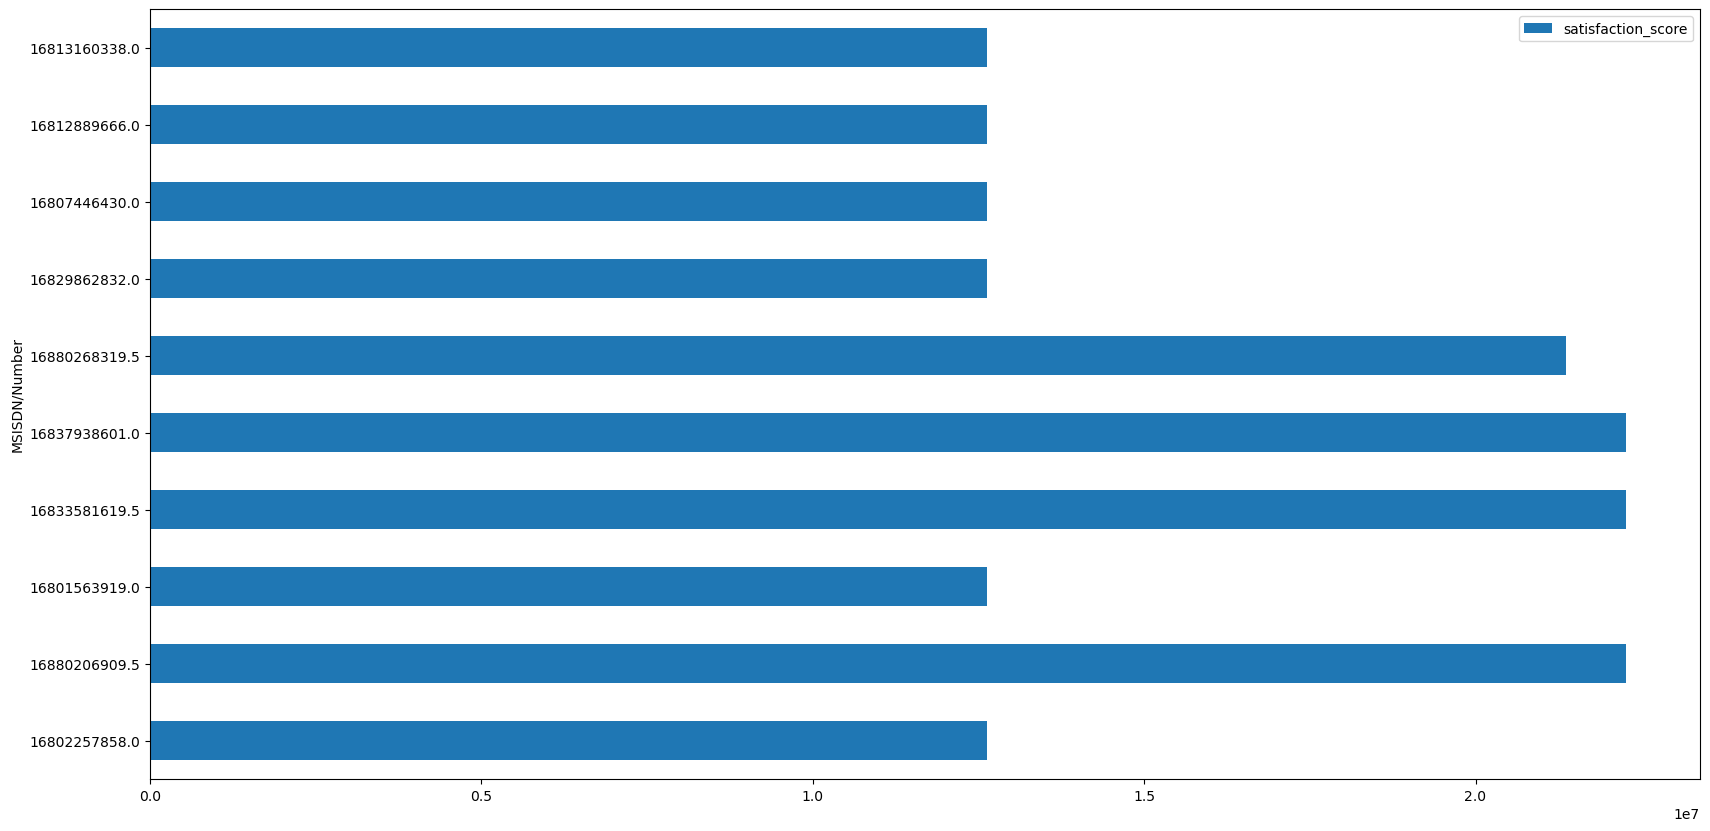

In [41]:
top_10_satisfied_customers.plot(kind="barh", figsize=(20, 10), x="MSISDN/Number", y="satisfaction_score").invert_yaxis()

In [34]:
satisfaction_kmeans = KMeans(n_clusters=2)
satisfaction_kmeans.fit_predict(satisfaction[["eng_score", "exp_score"]])

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
satisfaction["Cluster"] = satisfaction_kmeans.labels_

In [36]:
satisfaction

,eng_score,exp_score,MSISDN/Number,satisfaction_score,Cluster
0,6.776008,2.525609e+07,1.681316e+10,1.262805e+07,0
1,1.339709,2.525609e+07,1.681289e+10,1.262805e+07,0
2,0.772415,2.525609e+07,1.680745e+10,1.262805e+07,0
3,0.334041,2.525609e+07,1.682986e+10,1.262805e+07,0
4,0.666029,4.273570e+07,1.688027e+10,2.136785e+07,0
...,...,...,...,...,...
106851,0.000000,2.525609e+07,NaN,1.262805e+07,0
106852,0.000000,2.525609e+07,NaN,1.262804e+07,0
106853,0.000000,2.525609e+07,NaN,1.262804e+07,0
106854,0.000000,2.525609e+07,NaN,1.262804e+07,0


In [37]:
satisfation_agg = satisfaction.groupby(by="Cluster").agg({"eng_score": "sum", "exp_score": "sum"})

In [38]:
satisfation_agg

,eng_score,exp_score
Cluster,,
0,11.368194,3.494429e+12
1,0.000000,2.266658e+10


In [39]:
final_table = satisfaction[["MSISDN/Number", "eng_score", "exp_score", "satisfaction_score"]]

In [40]:
final_table

,MSISDN/Number,eng_score,exp_score,satisfaction_score
0,1.681316e+10,6.776008,2.525609e+07,1.262805e+07
1,1.681289e+10,1.339709,2.525609e+07,1.262805e+07
2,1.680745e+10,0.772415,2.525609e+07,1.262805e+07
3,1.682986e+10,0.334041,2.525609e+07,1.262805e+07
4,1.688027e+10,0.666029,4.273570e+07,2.136785e+07
...,...,...,...,...
106851,NaN,0.000000,2.525609e+07,1.262805e+07
106852,NaN,0.000000,2.525609e+07,1.262804e+07
106853,NaN,0.000000,2.525609e+07,1.262804e+07
106854,NaN,0.000000,2.525609e+07,1.262804e+07
